In [ ]:
import pandas as pd
import numpy as np


data = {
    'CustomerID': range(1, 21),
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male',
               'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female'],
    'Age': [34, 45, 23, 36, 50, 29, 42, 33, 28, 60, 26, 35, 40, 39, 41, 27, 55, 31, 44, 25],
    'Tenure': [10, 5, 3, 8, 4, 7, 12, 15, 6, 2, 10, 13, 9, 5, 8, 6, 11, 4, 7, 12],
    'MonthlyCharges': [70, 50, 60, 80, 100, 45, 65, 75, 55, 90, 85, 55, 95, 60, 70, 65, 80, 45, 100, 70],
    'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'West', 'East', 'North', 'South', 'West', 'East',
               'North', 'South', 'East', 'West', 'North', 'South', 'West', 'East'],
    'Churn': [1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0]
}


df = pd.DataFrame(data)


df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,Region,Churn
0,1,Male,34,10,70,North,1
1,2,Female,45,5,50,South,0
2,3,Female,23,3,60,East,1
3,4,Male,36,8,80,West,0
4,5,Female,50,4,100,North,1


In [ ]:

df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['Under 30', '30-40', '40-50', '50-60', '60+'])


df['Region'] = df['Region'].astype('category')


df['Charge_Group'] = pd.cut(df['MonthlyCharges'], bins=[0, 50, 75, 100, 150], labels=['Low', 'Medium', 'High', 'Very High'])


df['Tenure_Group'] = pd.cut(df['Tenure'], bins=[0, 5, 10, 15], labels=['0-5 Years', '5-10 Years', '10+ Years'])

segment_overview = df.groupby(['Age_Group', 'Region', 'Charge_Group', 'Tenure_Group'])['CustomerID'].count().reset_index()
segment_overview.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)

print(segment_overview)

    Age_Group Region Charge_Group Tenure_Group  Customer_Count
0    Under 30   East          Low    0-5 Years               0
1    Under 30   East          Low   5-10 Years               0
2    Under 30   East          Low    10+ Years               0
3    Under 30   East       Medium    0-5 Years               1
4    Under 30   East       Medium   5-10 Years               0
..        ...    ...          ...          ...             ...
235       60+   West         High   5-10 Years               0
236       60+   West         High    10+ Years               0
237       60+   West    Very High    0-5 Years               0
238       60+   West    Very High   5-10 Years               0
239       60+   West    Very High    10+ Years               0

[240 rows x 5 columns]


C:\Users\sures\AppData\Local\Temp\ipykernel_27020\2647004591.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_overview = df.groupby(['Age_Group', 'Region', 'Charge_Group', 'Tenure_Group'])['CustomerID'].count().reset_index()


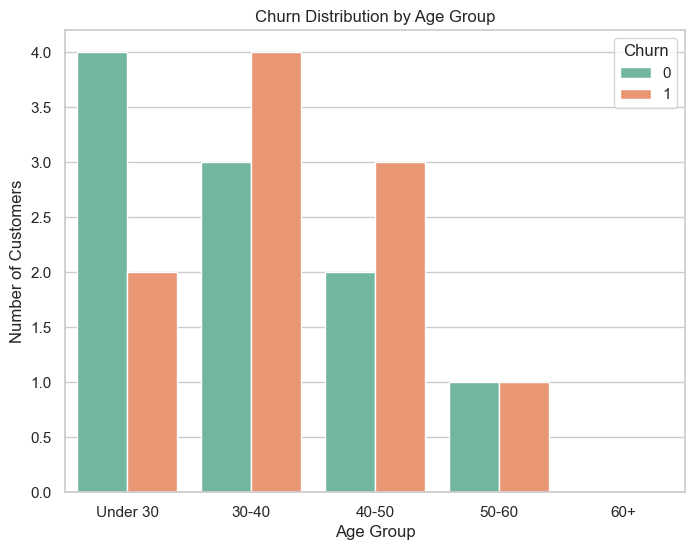

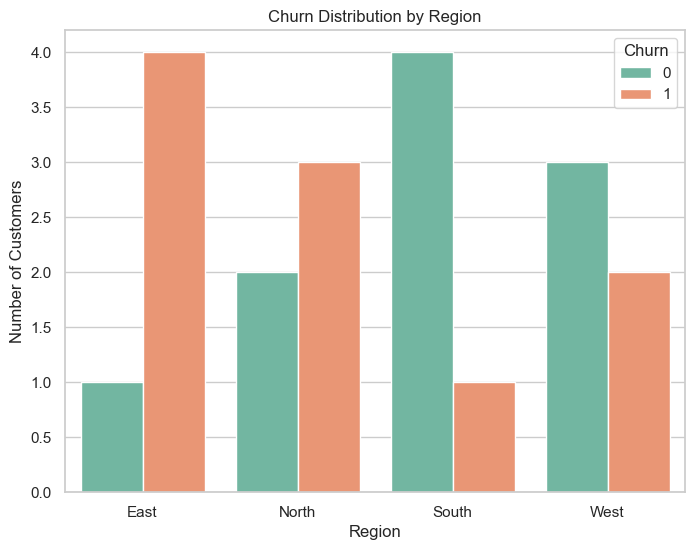

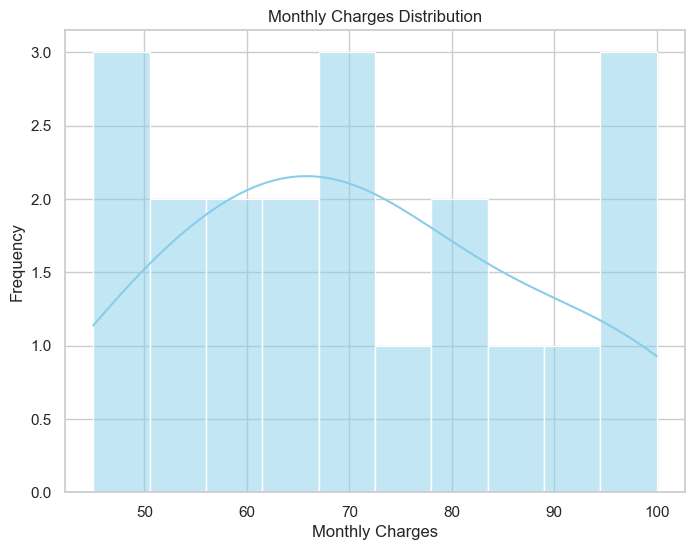

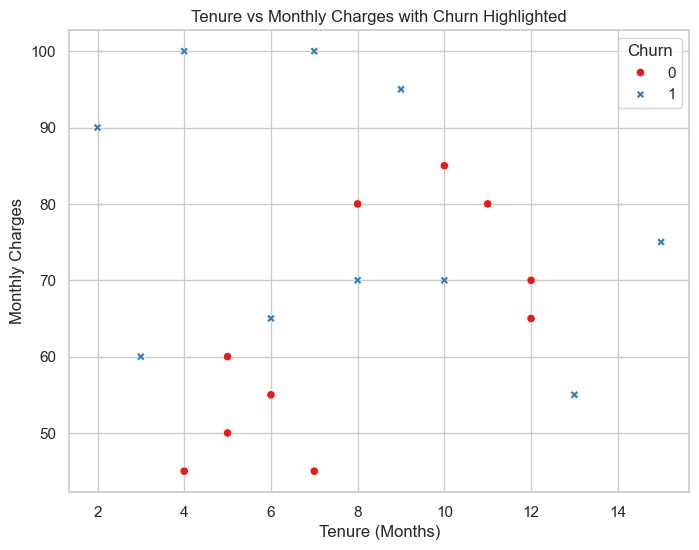

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Age_Group', hue='Churn', palette='Set2')
plt.title('Churn Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Region', hue='Churn', palette='Set2')
plt.title('Churn Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()


plt.figure(figsize=(8, 6))
sns.histplot(df['MonthlyCharges'], kde=True, color='skyblue', bins=10)
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Tenure', y='MonthlyCharges', hue='Churn', palette='Set1', style='Churn')
plt.title('Tenure vs Monthly Charges with Churn Highlighted')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.show()